# Ejercicio 3 - Simulación de distribuciones condicionadas

### Julian Ferres - Nro.Padrón 101483

## Enunciado:

Sea $X$ \~ $N(0,1)$ truncada al intervalo $[-1,1]$

Imagine $m(x) = E[Y | X=x]$ como:

   
   \begin{equation}
     m(x) := \left\{
 \begin{array}{ll}
      \frac{(x + 2)^2}{2} & \mathrm{si\ } si -1\leq x<-0.5 \\
    \frac{x}{2}+0.875     & \mathrm{si\ } -0.5 \leq x \leq 0\\
    -5(x-0.2)^2 +1.075 & \mathrm{si\ } 0 < x \leq 0.5 \\
    x + 0.125 & \mathrm{si\ } 0.5 \leq x < 1 
           \end{array}
         \right.
    \end{equation}

Dado un $x$, la distribución condicional de $Y - m(x)$ es $N(0, \sigma ^2(x))$,

con $\sigma(x)=0.2-0.1 * \cos(2x)$

- Se pide simular $200$ puntos $(X,Y)$, y graficarlos en un plano. Además, vamos a necesitar
Los $200$ pares ordenados en cuestión, para hacer análisis posteriores


- El código generador de los pares ordenados.

## Solución:

#### Importo todas las librerias e inicializo funciones

In [395]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import cos, pi
from scipy.stats import truncnorm

In [396]:
m1 = lambda x: (x+2)**2/2
m2 = lambda x: x/2 + 0.875
m3 = lambda x: -5*(x-0.2)**2 + 1.075
m4 = lambda x: x + 0.125

In [397]:
def m(x):
    if -1 <= x < -0.5:
        return m1(x)
    if -0.5 <= x < 0:
        return m2(x)
    if 0 <= x < 0.5:
        return m3(x)
    if 0.5 <= x < 1:
        return m4(x)

m = np.vectorize(m)

In [398]:
x_0 = np.linspace(-1,1,1000) #Me genero 1000 valores entre -1 y 1 para graficar m(x) 'suave'
y_0 = m(x_0)

#### Normal truncada 

In [399]:
a , b = -1 , 1 #Limites de la normal truncada

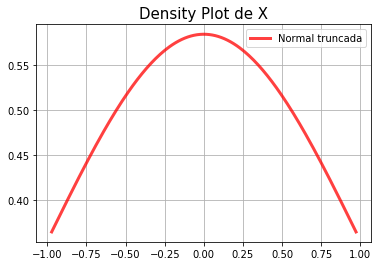

In [400]:
x1 = np.linspace(truncnorm.ppf(0.01, a, b),
                truncnorm.ppf(0.99, a, b), 200) #Genero 200 cuantiles de la normal truncada 

plt.plot(x1, truncnorm.pdf(x1, a, b),
        'r-', lw=3, alpha=0.75, label='Normal truncada')
plt.title("Density Plot de X",fontsize='15')
plt.legend(loc='best', frameon= True)
plt.grid()

In [401]:
x1 = truncnorm.rvs(a, b, size=200)
#Me genero la muestra de distribucion X

In [402]:
sigma = np.vectorize(lambda x : 0.2 - 0.1 * cos(2*pi*x))
normal = np.vectorize(np.random.normal)

y1 = normal( m(x1),sigma(x1))

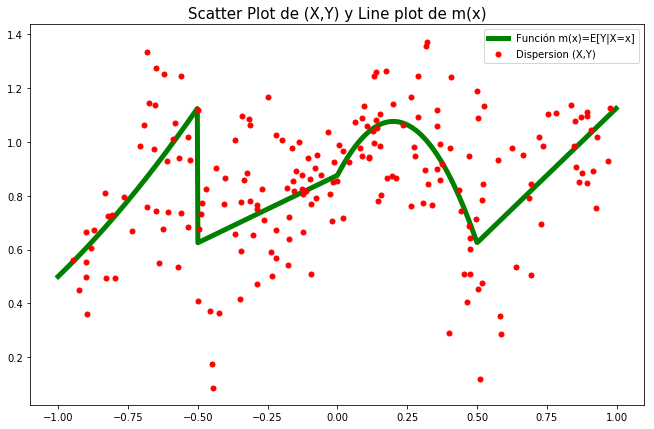

In [403]:
fig, ax = plt.subplots(figsize=(11,7))
plt.plot(x_0, y_0, 'g-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

plt.plot(x1, y1, 'ro' ,markersize= 5, label = 'Dispersion (X,Y)')
plt.legend(loc='best', frameon= True)

plt.title("Scatter Plot de (X,Y) y Line plot de m(x)", fontsize='15')
plt.show()

#### La muestra de los $200$ pares con distribución $(X,Y)$ se encuentra en la variable output

## Reconstruyo la regresión

#### Con h=0.5 y M=1 

In [404]:
partition = [[],[],[],[]]
for i in range(200):
    partition[int(2*(x1[i]+1))].append(i)

In [405]:
polinomio_a_trozos = []

for i in range(4):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,1)
    polinomio_a_trozos.append(np.poly1d(z))

In [406]:
xp=[]
xp.append(np.linspace(-1, -0.5, 200))
xp.append(np.linspace(-0.5,0, 200))
xp.append(np.linspace(0, 0.5, 200))
xp.append(np.linspace(0.5,1, 200))

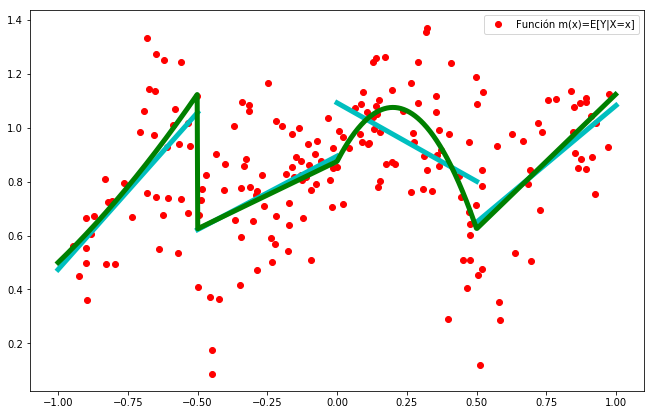

In [407]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

for i in range(4):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'c-', linewidth = 5 )
   
plt.plot(x_0, y_0, 'g-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')

plt.show()

#### Con h=0.1 y M=1 

In [408]:
partition = [[] for i in range(20)]
for i in range(200):
    partition[int(10*(x1[i]+1))].append(i)

In [409]:
polinomio_a_trozos = []

for i in range(20):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,1)
    polinomio_a_trozos.append(np.poly1d(z))

In [410]:
xp=[]

for i in range(20):
    xp.append(np.linspace(-1+i*(1/10), -0.9+i*(1/10), 200))

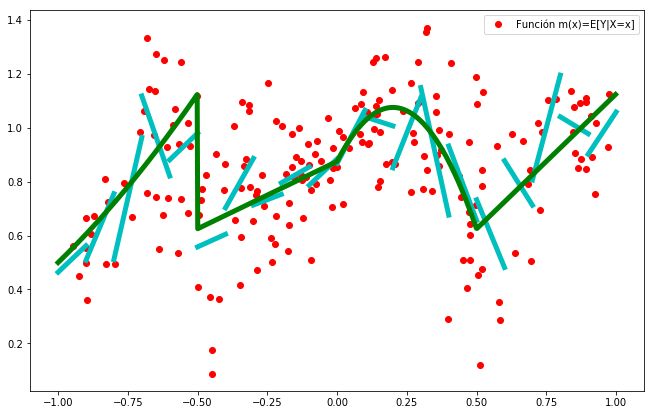

In [411]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

for i in range(20):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'c-', linewidth = 5 )

plt.plot(x_0, y_0, 'g-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')

plt.show()

#### Con h=0.25 y M=2 

In [412]:
partition = [[] for i in range(8)]
for i in range(200):
    partition[int(4*(x1[i]+1))].append(i)

In [413]:
polinomio_a_trozos = []

for i in range(8):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,2)
    polinomio_a_trozos.append(np.poly1d(z))

In [414]:
xp=[]

for i in range(8):
    xp.append(np.linspace(-1+i*(1/4), -1+(i+1)*(1/4), 200))

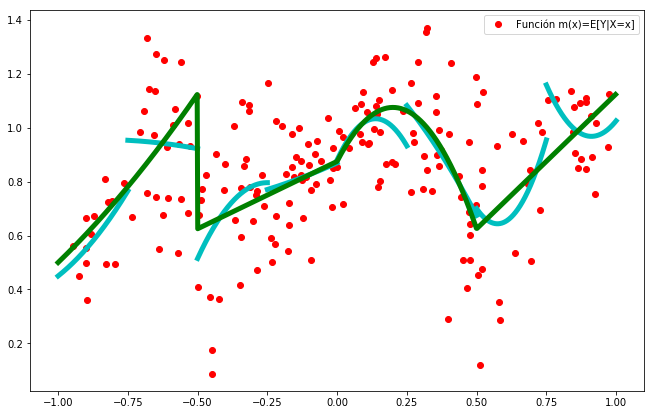

In [415]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

for i in range(8):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'c-', linewidth = 5 )

plt.plot(x_0, y_0, 'g-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')

plt.show()

#### Con h=0.5 y M=2 

In [416]:
partition = [[] for i in range(4)]
for i in range(200):
    partition[int(2*(x1[i]+1))].append(i)

In [417]:
polinomio_a_trozos = []

for i in range(4):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,2)
    polinomio_a_trozos.append(np.poly1d(z))

In [418]:
xp=[]
for i in range(4):
    xp.append(np.linspace(-1+i*(1/2), -1+(i+1)*(1/2), 200))

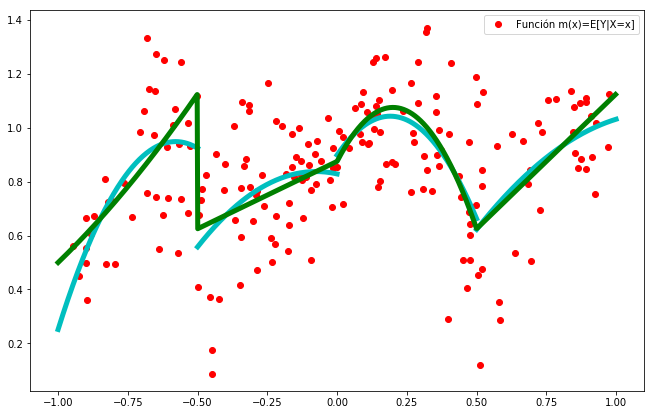

In [419]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

for i in range(4):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'c-', linewidth = 5 )

plt.plot(x_0, y_0, 'g-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')

plt.show()

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git